# PRE-PROCESSING
## BINARIZZAZIONE

**Binarizzazione a soglia fissa:**
Per ogni pixel viene applicato lo stesso valore di soglia: se il valore del pixel è inferiore alla soglia, è impostato su 0, altrimenti è impostato su un valore massimo.
Per applicare questo valore di soglia usiamo la libreria cv2, in particolare il metodo threshold:
In cv2.threshold il primo argomento è l'immagine sorgente (in scala di grigi); il secondo argomento è il valore di soglia utilizzato per classificare i valori dei pixel; il terzo argomento è il valore massimo assegnato a valori di pixel che superano la soglia e infine OpenCV fornisce diversi tipi di soglie fornite dal quarto parametro della funzione. 
In questo caso la soglia di base viene eseguita utilizzando il tipo cv.THRESH_BINARY. 

Il metodo ha due output: il primo è la soglia utilizzata (in questo caso 127) e il secondo è l'immagine effettivamente binarizzata.

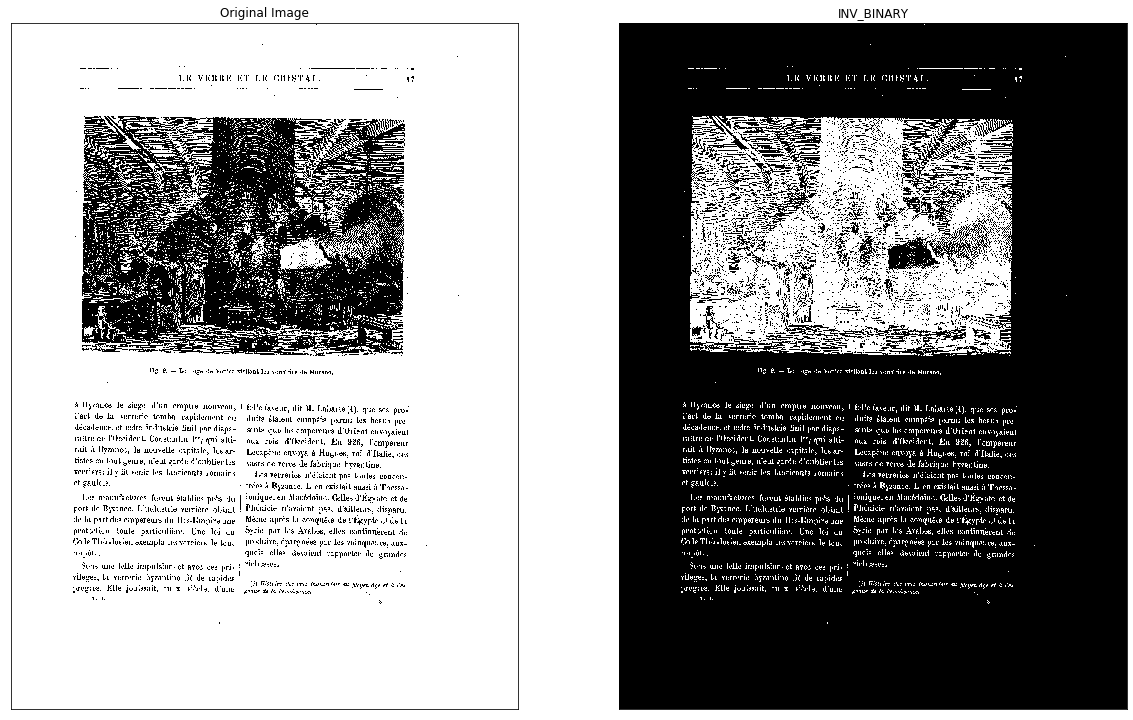

In [50]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt
#np.savetxt('matriciona.txt',labels, fmt='%10.5f', delimiter='\t')
#path = 'D:/OpenCV/Scripts/Images'
#cv2.imwrite(os.path.join(path , 'x.jpg'),img)

img_name='prova2.tif'
img = cv2.imread(img_name,0)
_,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
new_name=img_name[:-4]+'_bin.tif'
cv2.imwrite(new_name, thresh)

titles = ['Original Image','INV_BINARY']
images = [img, thresh]

for i in range(1):    
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1,2,i+2),plt.imshow(images[i+1],'gray')
    plt.title(titles[i+1]), plt.xticks([]), plt.yticks([])
    '''    
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    #plt.savefig('thresh.png', dpi=1800)
    '''
plt.show()



**Binarizzazione Otsu e Sauvola:** 
Nell'analisi dei documenti, spesso le immagini a disposizione possono avere del rumore, abbiamo quindi bisogno di un metodo per separare il background dal foreground. 
La soglia Otsu, che può essere applicata nella segmentazione e nella binarizzazione delle immagini, è un metodo di soglia adattativo.
Esaminando tutti i possibili valori di soglia (da 0 a 255), trova il valore di soglia ottimale in modo che la varianza sia minima.
Utilizziamo l'istogramma per rappresentare la distribuzione del valore dei pixel(tra 0 e 255).
Scegliendo come valore di soglia 2, l'immagine viene separata in due classi, che corrispondono al background e al foreground.

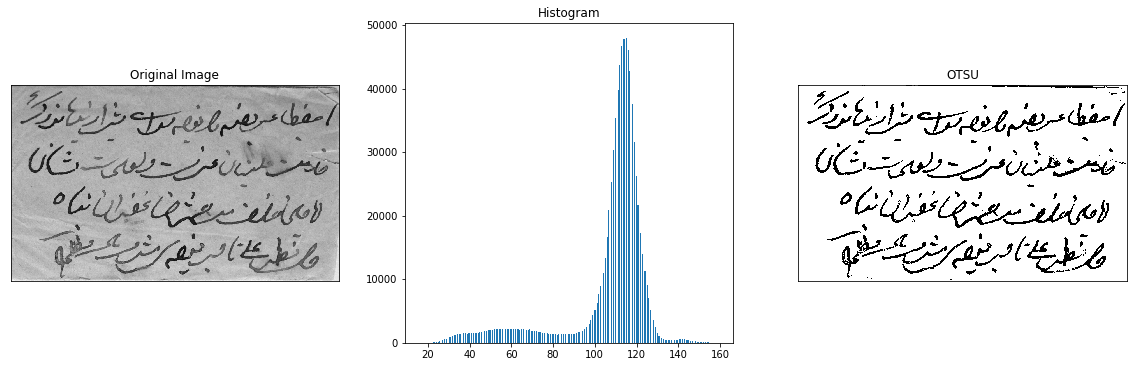

In [49]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt

img_name='persian.jpg'
img = cv2.imread(img_name,0)
_,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
new_name=img_name[:-4]+'_otsu.tif'
cv2.imwrite(new_name, thresh)

titles = ['Original Image','Histogram',"OTSU"]
images = [img, 0, thresh]

for i in range(1):
    plt.figure(figsize=(20,20))
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+2),plt.hist(images[i].ravel(),256)
    plt.title(titles[i+1])#, plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+3),plt.imshow(images[i+2],'gray')
    plt.title(titles[i+2]), plt.xticks([]), plt.yticks([])
    #plt.savefig('thresh_otsu.png', dpi=1800)
    
plt.show()

"""
plt.title(titles[0])
plt.imshow(images[0],'gray'), plt.xticks([]), plt.yticks([])
plt.show()
plt.title(titles[1])
plt.hist(images[0].ravel(),256)
plt.show()
plt.title(titles[2])
plt.imshow(images[2],'gray'), plt.xticks([]), plt.yticks([])
plt.show()
"""




**Binarizzazione Sauvola** 

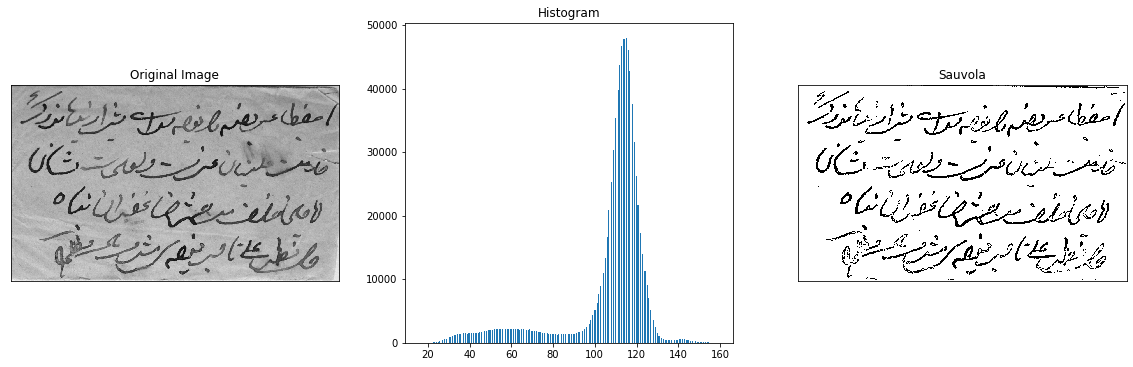

In [43]:
from skimage.filters import threshold_sauvola
import sklearn.preprocessing 

img_name='persian.jpg'
img = cv2.imread(img_name,0)
bin_sauvola = sklearn.preprocessing.binarize(img, threshold_sauvola(img))
#bin_sauvola è binaria: 0 è nero, 1 è bianco -> per visualizzarla imposto 1=255
rows,cols=bin_sauvola.shape
for i in range(rows):
    for j in range(cols):
        if bin_sauvola[i][j]==1:
            bin_sauvola[i][j]=255
new_name=img_name[:-4]+'_sauvola.tif'
cv2.imwrite(new_name, bin_sauvola)

titles = ['Original Image','Histogram',"Sauvola"]
images = [img_gray, 0, bin_sauvola]

for i in range(1):
    plt.figure(figsize=(20,20))
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+2),plt.hist(images[i].ravel(),256)
    plt.title(titles[i+1])#, plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+3),plt.imshow(images[i+2],'gray')
    plt.title(titles[i+2]), plt.xticks([]), plt.yticks([])
    #plt.savefig('thresh_otsu.png', dpi=1800)
plt.show()

# CONNECTED COMPONENTS
Le **componenti connesse** sono utilizzate nella document recognition  per segmentare e identificare gli elementi in un’immagine binaria. In particolare l’algoritmo per determinare le CC è iterativo ed etichetta un immagine in base alla vicinanza con il pixel vicino; due pixel sono vicini se sono tra loro connessi, si distingue quindi la connettività a 4 e ad 8 pixel.

Anche in questo caso per calcolare le CC utilizziamo la libreria cv2, infatti tramite la funzione connectedComponents( ), che ci permette di indicare il valore di connettività da utilizzare (4 o 8), possiamo calcolare il numero di cc rilevate e una matrice con le stesse dimensioni dell’immagine di input in cui ogni pixel ha un valore: tutti i pixel 0 rappresentano lo sfondo, il pixel che ha valore 1 rappresenta il primo cc e così via.

number of CC with connectivity 4: 49


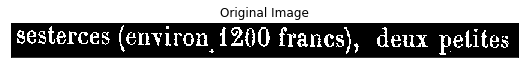

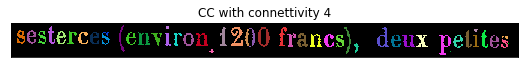

number of CC with connectivity 8: 45


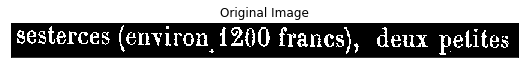

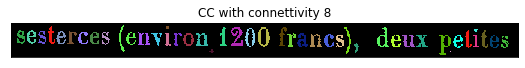

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *

img_name='row.tif'
img = cv2.imread(img_name, 0)
img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
#img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[1]
    
def show_CC(img,conn):
    cc, labels = cv2.connectedComponents(img,connectivity=conn)
    #creo immagine a 3 canali
    labeled_img = cv2.merge([labels,labels,labels])
    rows,cols,ch= np.shape(labeled_img)
    #creo una matrice di colori da assegnare alle componenti connesse
    savedcolor=random_colors(cc)
    
    for i in range(rows):
        for j in range(cols):
            if labeled_img[i][j][0]!=0:
                for h in range(len(savedcolor)):
                    if labeled_img[i][j][0]==savedcolor[h][0]:
                        labeled_img[i][j]=savedcolor[h][1]           

    if conn==4:
        new_name=img_name[:-4]+'_CC4.tif'
        cv2.imwrite(new_name,labeled_img)
        print('number of CC with connectivity 4:',cc)
        titles = ['Original Image','CC with connettivity 4']
    elif conn==8:
        new_name=img_name[:-4]+'_CC8.tif'
        cv2.imwrite(new_name,labeled_img)
        print('number of CC with connectivity 8:',cc)
        titles = ['Original Image','CC with connettivity 8']
    images = [img, labeled_img]
    for i in range(2):
        plt.figure(figsize=(20,20))
        plt.subplot(1,2,i+1),plt.imshow((images[i]),'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])

    plt.show()
    
def random_colors(cc):
    savedcolor=[]
    for k in range(cc):
        color = list(np.random.choice(range(256), size=3))
        savedcolor.append([k,color])
    savedcolor[0][1]=[0,0,0]
    return savedcolor
    
def main_colors(cc):
    savedcolor=[]
    main_color=[[255,0,0],[255,255,255],[255,255,0],[0,255,0],[0,255,255],[0,0,255],[255,0,255],[128,0,128],[0,128,0]]
    for l in range(cc):
        color=randint(0,8)
        savedcolor.append([l,main_color[color]])
    savedcolor[0][1]=[0,0,0]
    return savedcolor


show_CC(img,4)
show_CC(img,8)

# RLSA
...

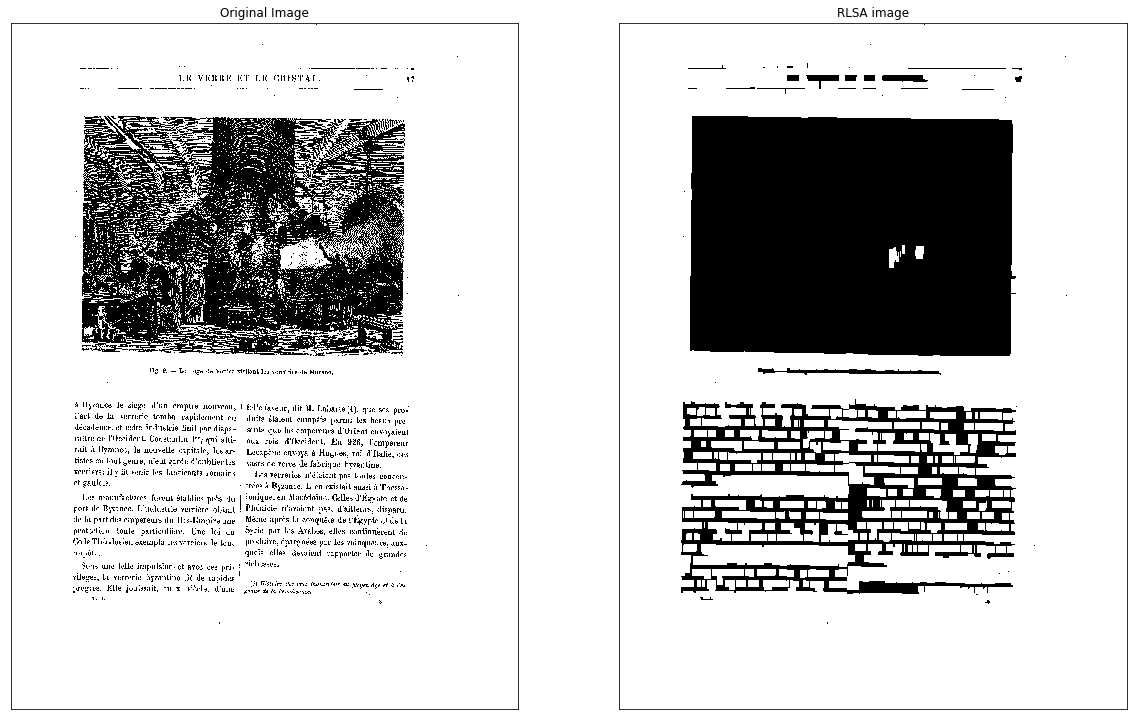

In [25]:
import numpy

img_name='prova2.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    #esegue l'iterazione sull'immagine fornita convertendo il valore del pixel da 255 a 0 se 
    #il numero di pixel consecutivi con valore 255 è minore del "valore" fornito
def iteration(image, value: int):
    rows, cols = image.shape
    for row in range(rows):
        try:
            start = image[row].tolist().index(0)
        except ValueError:
            start = 0

        count = start
        for col in range(start, cols):
            if image[row, col] == 0:
                if (col-count) <= value and (col-count) > 0:
                    image[row, count:col] = 0               
                count = col  
    return image 


    #RLSA consiste nell'estrarre il blocco di testo o la Regione di interesse(ROI) dall'immagine binaria
    #del documento. Bisogna passargli un'immagine binaria di tipo ndarray.
def rlsa(image, horizontal: bool = True, vertical: bool = True, value: int = 0):
    if horizontal:
            image = iteration(image, value)
    if vertical: 
            image = image.T
            image = iteration(image, value)
            image = image.T
    return image

newimg=rlsa(img_bin,value=30)
new_name=img_name[:-4]+'_RLSA.tif'
cv2.imwrite(new_name,newimg)
titles = ['Original Image','RLSA image']
images = [img, newimg]

for i in range(1):
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])

    plt.subplot(1,2,i+2),plt.imshow(images[i+1],'gray')
    plt.title(titles[i+1]), plt.xticks([]), plt.yticks([])

**Come sapere quale value mettere nella funzione RLSA?**

Viene stabilito in base alla distanza media dei pixel nell'immagine. La seguente funzione calcola la distanza tra i pixel e ne fa la media.

trovo le CC, faccio il quadratino, trovo il centroide del quadratino, calcolo la distanza tra i centroidi..trovo la distanza media

[732, 48, 2, 2]
[330, 45, 8, 6]
[572, 35, 8, 17]
[817, 23, 13, 20]
[798, 22, 15, 21]
[771, 22, 9, 20]
[737, 21, 16, 22]
[714, 21, 20, 33]
[675, 21, 20, 21]
[652, 21, 22, 21]
[633, 21, 17, 21]
[542, 21, 13, 21]
[522, 20, 17, 22]
[498, 20, 21, 22]
[477, 19, 19, 23]
[461, 19, 16, 22]
[309, 18, 20, 21]
[287, 18, 18, 21]
[272, 18, 13, 21]
[256, 18, 10, 21]
[234, 18, 19, 21]
[211, 17, 21, 21]
[192, 17, 16, 21]
[151, 16, 14, 22]
[132, 16, 15, 21]
[112, 16, 17, 21]
[93, 15, 17, 21]
[75, 15, 16, 21]
[45, 15, 14, 21]
[783, 14, 12, 29]
[26, 14, 16, 22]
[10, 14, 14, 22]
[756, 13, 12, 30]
[772, 11, 6, 6]
[390, 10, 17, 31]
[610, 9, 20, 33]
[556, 9, 11, 44]
[447, 9, 14, 31]
[411, 9, 21, 32]
[348, 9, 12, 30]
[366, 8, 20, 32]
[61, 7, 12, 29]
[258, 6, 6, 6]
[180, 5, 10, 44]
[]


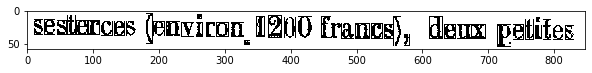

In [200]:
img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
points=[]

for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    print([x,y,w,h])
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    #non so se usare i centroidi..è un bel casino
    points.append([(x+(x+w))/2,(y+(y+h))/2])
    cX = int((x+(x+w))/2)
    cY = int((y+(y+h))/2)
    cv2.circle(img, (cX, cY), 1, (255, 255, 255), -1)

plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')
print(points)

36293 7123
value: 5.095184613224765


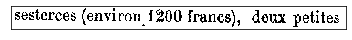

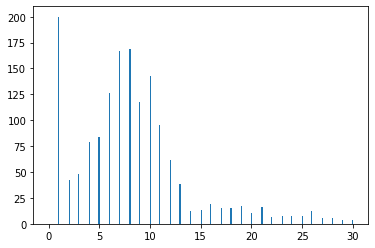

In [193]:
img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

def pixelDistance(image, vertical: bool = False):
    if vertical:
        image = image.T #la uso per calcolare la distanza tra pixel in verticale
    rows, cols = image.shape
    distance=[]
    count=0
    i1=0
    flag=0
    i2=0

    for i in range(rows):
        for j in range(cols):
            '''if image[i][j]==255 and image[i][0]==255:
                if i!=i2:
                    flag=1
                    i2=i
                else:
                    flag=flag+1
                    i2=i'''
            if image[i][j]==0:
                if i!=i1:
                    distance.append('-1')
                    i1=i
                    count=0
                elif j-count-flag!=0:
                        distance.append(j-count-flag)
                        flag=0
                        count=j
                    
    distance=np.array(distance)
    return distance

def valueRLSA(distance):
    rows=distance.shape[0]
    numSum=0
    sumDist=0 
    distance = distance.astype(np.int)
    
    for k in range(rows):
        if distance[k]!= -1:
            sumDist=sumDist+distance[k]
            numSum=numSum+1  
    print(sumDist, numSum)
            
    value=sumDist/numSum
    print('value:',value)
    return value

def histogram(image,distance):
    rows=distance.shape[0]
    distance = distance.astype(np.int)
    max=0
    for h in range(rows):
        if distance[h]>max:
            max=distance[h]
    
    #serve per rendere il grafico piu leggibile, elimina pixel a distanza 1
    q1=0
    for l in range(rows):
        if distance[l]==1 and q1<200:
            q1=q1+1
        elif distance[l]==1:
            distance[l]=-1
            
    plt.imshow(image,'gray'), plt.xticks([]), plt.yticks([]), plt.show()
    plt.hist(distance,256,[0,30]), plt.show()
    #plt.savefig('hist.png', dpi=1800)

pix_dist=pixelDistance(img_bin)
value=valueRLSA(pix_dist)
histogram(img_bin,pix_dist)

**RLSA+CC**

Questo paragrafo dovrà contenere il calcolo dell'RLSA adattivo, per il momento separato perche non funziona bene!

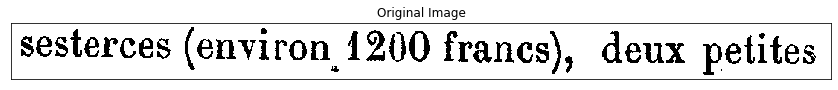

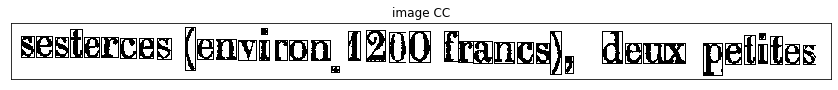

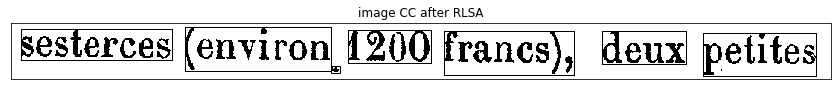

In [239]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt

img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img2=img_bin.copy()
contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    
new_name=img_name[:-4]+'_rect.tif'
cv2.imwrite(new_name,img_bin)


img_rlsa = rlsa(img_bin.copy(), value=6)

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_rlsa)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours:
    #disegna un rettangolo verde intorno alle parole
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img2, (x,y), (x+w,y+h), (0, 255, 0), 1)

new_name=img_name[:-4]+'_rectRLSA.tif'
cv2.imwrite(new_name,cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

titles = ['Original Image','image CC', 'image CC after RLSA']
images = [img, img_bin, img2]

for i in range(3):
    plt.figure(figsize=(50,50))
    plt.subplot(1,3,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

**RLSA adattivo**

trovo le CC, faccio il quadratino, trovo il centroide del quadratino, calcolo la distanza tra i centroidi..trovo la distanza media

value: 5.095184613224765


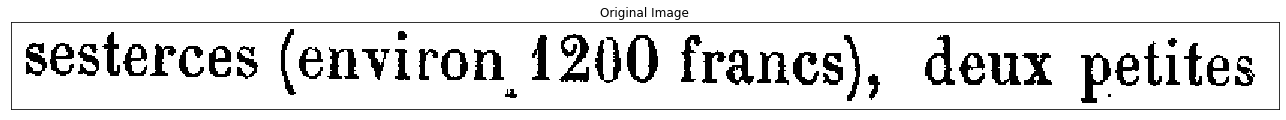

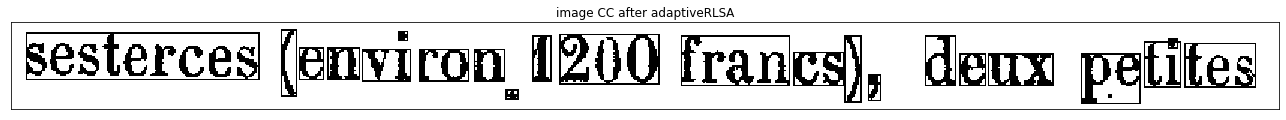

In [237]:
img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img2=img_bin.copy()

pix_dist=pixelDistance(img_bin)
valueRlsa=valueRLSA(pix_dist)

#non funziona molto bene, è necessario aggiungere 2 al value trovato -- ho capito perchè RISOLVERE!!
img_rlsa = rlsa(img_bin.copy(), value=valueRlsa)

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_rlsa)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours:
    #disegna un rettangolo verde intorno alle parole
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img2, (x,y), (x+w,y+h), (0, 255, 0), 1)

titles = ['Original Image', 'image CC after adaptiveRLSA']
images = [img, img2]
#cv2.imwrite('uffa.tif',cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

for i in range(2):
    plt.figure(figsize=(50,50))
    plt.subplot(1,2,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

## Hough Transform

best_angle: 14.72823303292863


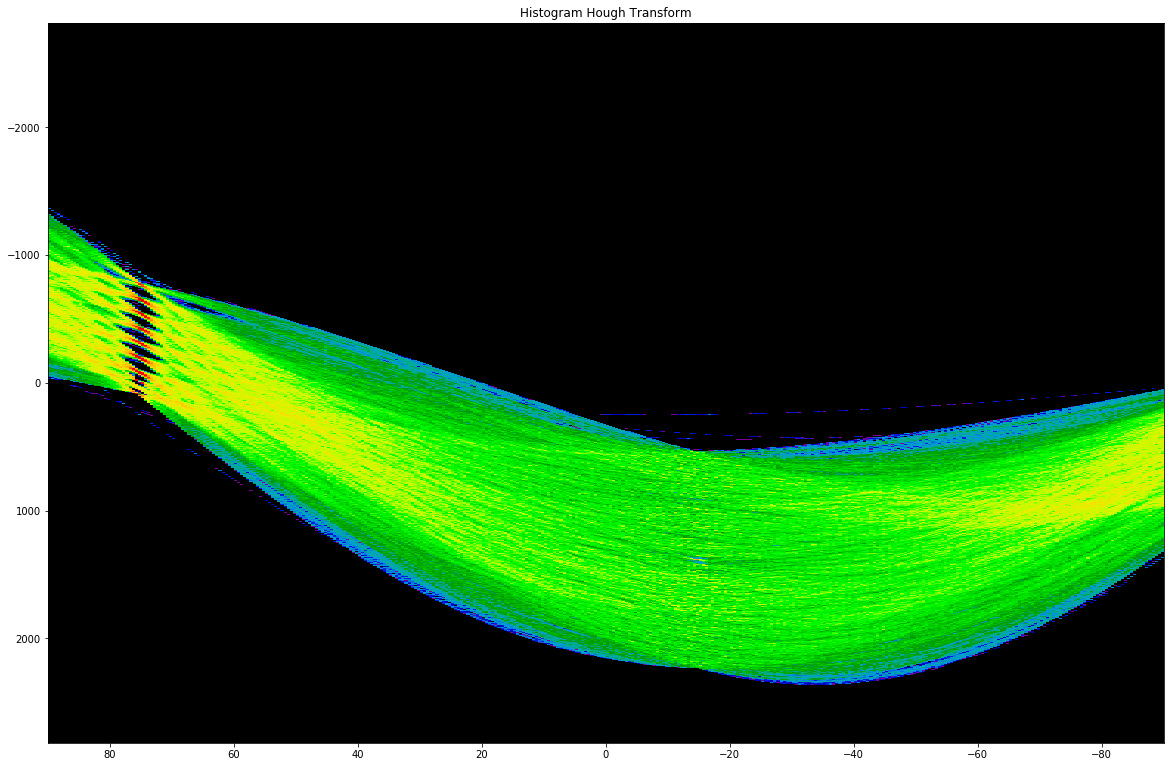

In [352]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *
from skimage.transform import hough_line
import math

def removeFigures(binarized_img,original_img):
    contours,_ = cv2.findContours(np.uint8(np.logical_not(binarized_img)), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.ones(original_img.shape[:2], dtype="uint8") * 255
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        if w>300 or h>300:
            cv2.drawContours(mask, [contour], -1, 0, -1)
    original_img = cv2.bitwise_and(~original_img, ~original_img, mask=mask)
    return ~original_img
        

def houghTransformDeskew(binarized_img,original_img):
  
    edges = cv2.Canny(binarized_img, 50, 200, 3)#find edges on the image
    img_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR) #convert edges image from Gray to BGR

    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 80,None,100,10)#None,100 #function used for finding coordinates x0,y0 and x1,y1 for deskew
    tested_angles = np.linspace(-np.pi/2, np.pi / 2, 360)
    h, theta, d = hough_line(edges,tested_angles)#function used for plot histogram Hough transform
    
    if lines is not None:
        angle = 0.0
        num_lines = len(lines)
        
        for i in range(0, len(lines)):
            #write blue lines on image according to Hough lines
            l = lines[i][0]
            cv2.line(img_lines, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)
            angle += math.atan2(l[3]*1.0 - l[1]*1.0,l[2]*1.0 - l[0]*1.0)
           
        
        angle /= num_lines*1.0
        best_angle = angle* 180.0 / np.pi
        
        print('best_angle:',best_angle)
        #cv2.imshow('Detected Lines with Probabilistic Line Transform', img_lines)
        cv2.imwrite('Detected Lines with Probabilistic Line Transform.png', img_lines)#non so se puo essere utile ai fini del progetto stampare le linee 
        
        (height, width) = original_img.shape[:2]
        center = (width // 2, height // 2)
        #print('width:',width,'height:',height)
        #show histogram
        plt.figure(figsize=(20,20))
        plt.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],cmap ='nipy_spectral',aspect=1.0 / (height/30))
        plt.title('Histogram Hough Transform')
        plt.savefig('Hough Transform.png')#, dpi=1800)
        
        root_mat = cv2.getRotationMatrix2D(center, best_angle, 1)
        rotated = cv2.warpAffine(original_img, root_mat, (width,height), flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE) 
        return rotated
    return None

img_name='rotazione.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img_rlsa = rlsa(img_bin.copy(), value=6)

img_no_figures = removeFigures(img_rlsa,img)
#plt.imshow(img_no_figures), plt.xticks([]), plt.yticks([]), plt.show()
cv2.imwrite('Image Without Figures.png', img_no_figures)

rotated = houghTransformDeskew(img_no_figures,img)
if rotated is not None:
    #plt.imshow(rotated), plt.xticks([]), plt.yticks([]), plt.show()
    cv2.imwrite('Rotated Image.tif', rotated)
else:
    print('Image not skewed')

## Projection

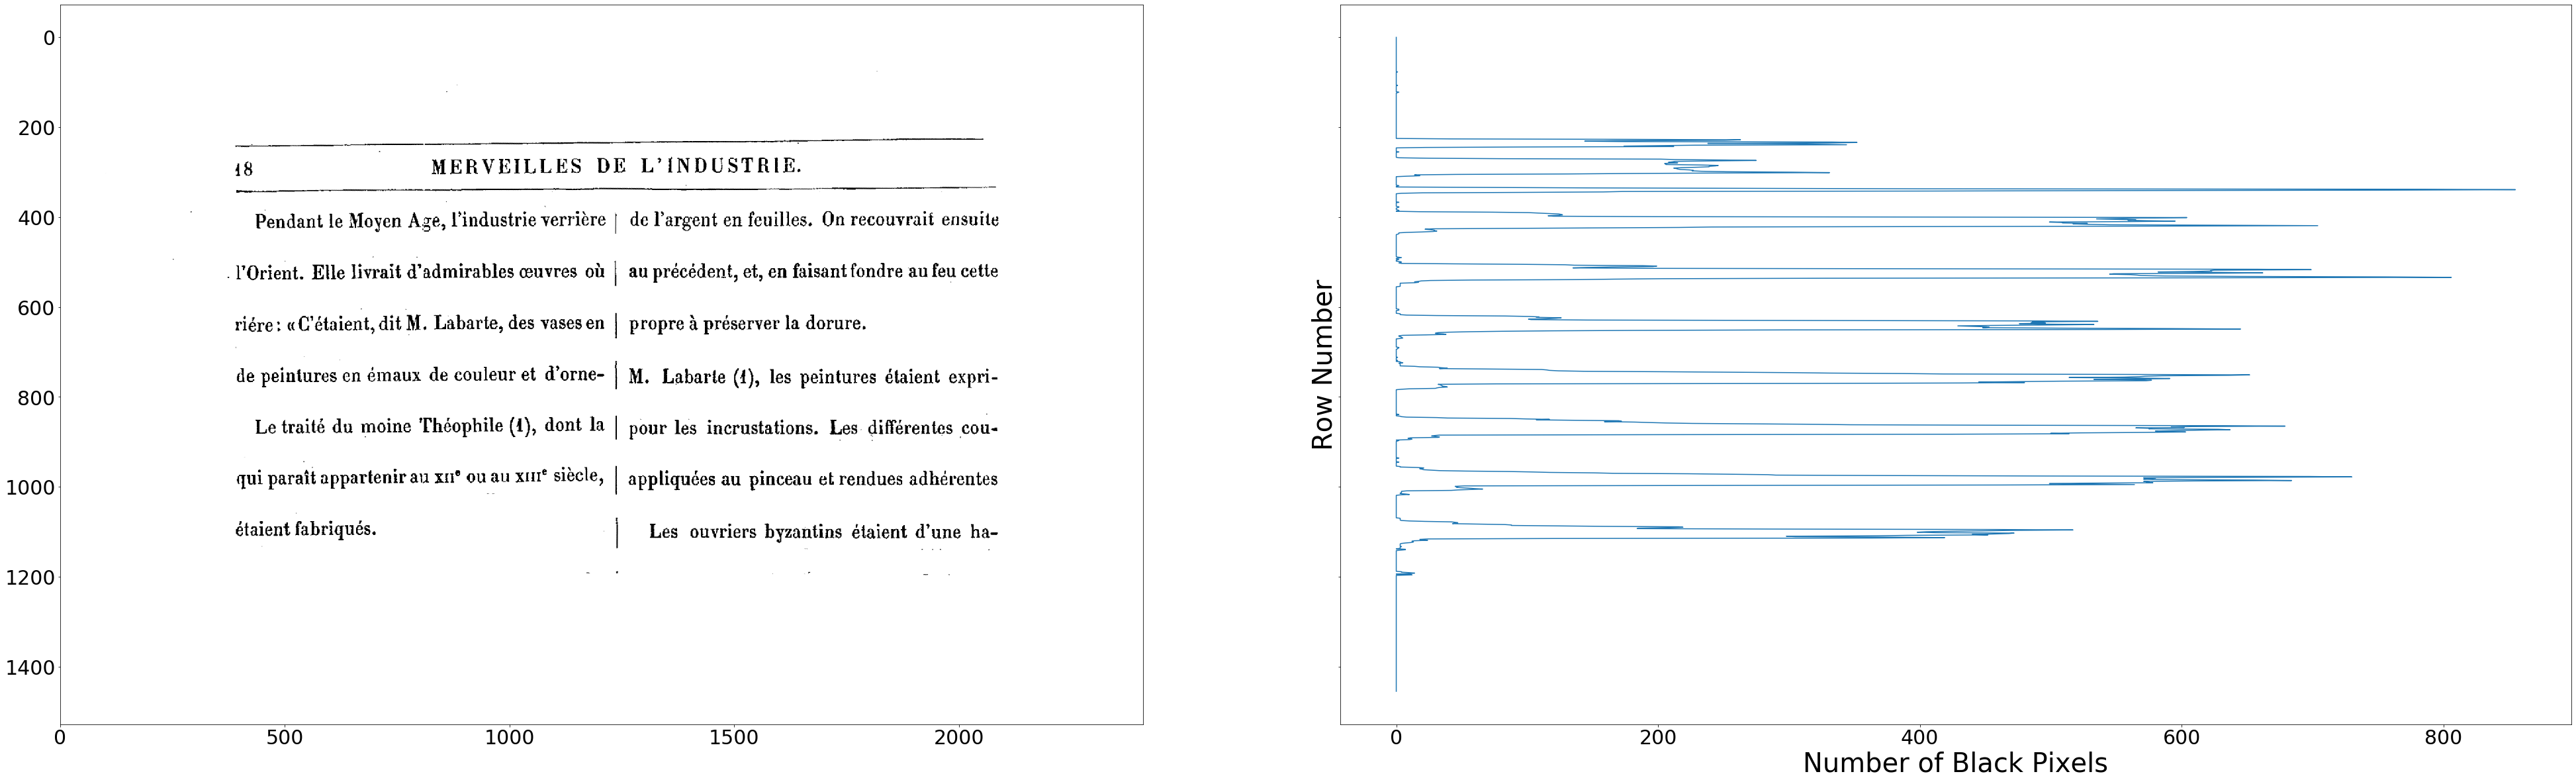

In [114]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *

img_name='Rotated Image.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

#Counting black pixels per row (axis=0: col, axis=1:row)
counts = np.sum(img_bin==0, axis=1) 
row_number = [i for i in range(img_bin.shape[0])]
#counts = smooth(counts,20) #ammorbidisce il grafico dei pixel

f, (ax1,ax2)= plt.subplots(1, 2, sharey=True, figsize=(70, 20))#(70,40)
ax1.imshow(img,'gray')#, plt.yticks([])
ax1.tick_params(axis='both', which='major', labelsize=30)
ax2.plot(counts,row_number,label='fit')
ax2.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel('Number of Black Pixels',fontsize=40)
plt.ylabel('Row Number',fontsize=40)
plt.subplots_adjust( wspace = 0.1)#-0.1
plt.savefig('Projection.png')#, dpi=1800)

plt.show()


# Layout 
## Bottom-Up methods
### MST
...

### DocStrum

### Voronoi

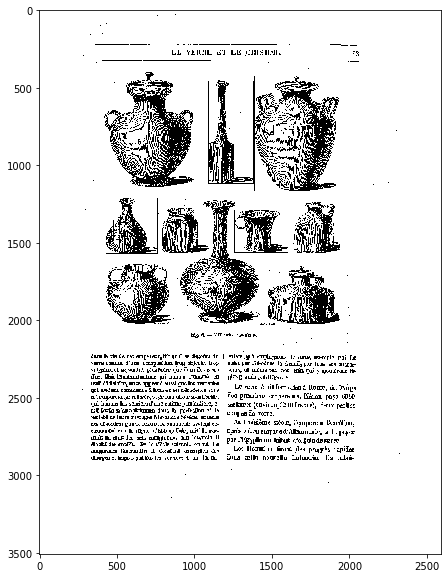

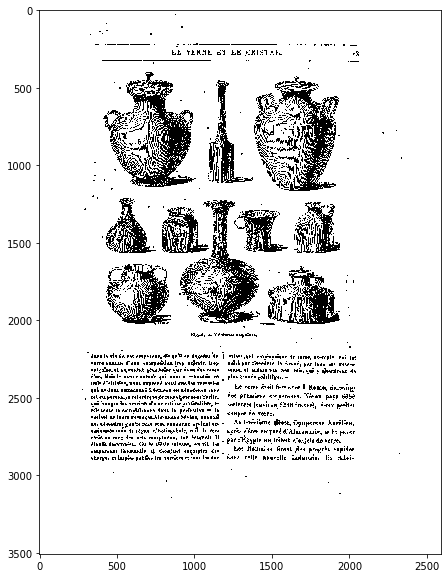

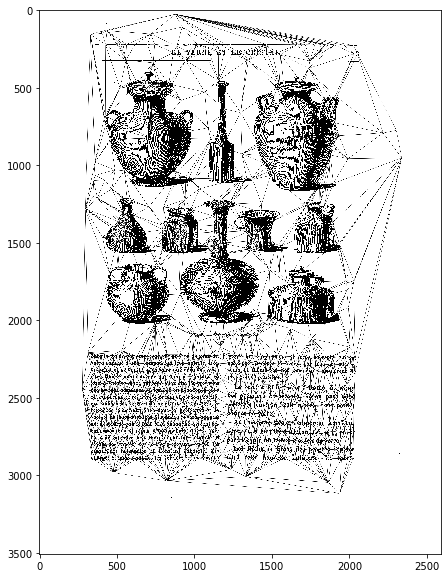

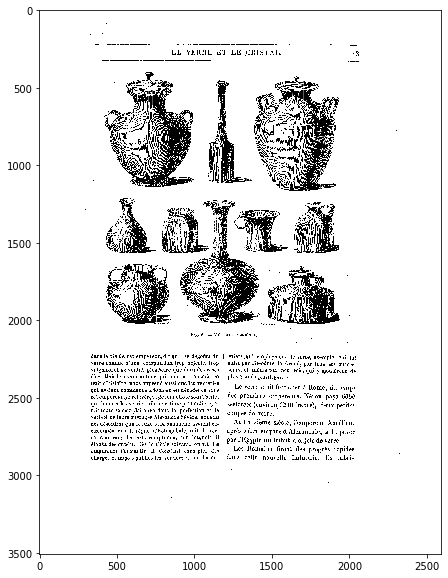

In [283]:
def printContours(binarization,output_img):
    #draw a green rectangle around to characters/words
    contours,_  = cv2.findContours(np.uint8(np.logical_not(binarization)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        cv2.rectangle(output_img, (x,y), (x+w,y+h), (0, 255, 0), 1)
        
def findCentroids(binarization,output_img):
    contours,_  = cv2.findContours(np.uint8(np.logical_not(binarization)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    points = []
    f = open('punti.txt', 'w')
    
    for contour in contours:
        M = cv2.moments(contour)
 
        # calculate x,y coordinate of center
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            points.append((cX,cY))
            f.write(str(cX) + ' ' + str(cY) + '\n')
        else:
            cX, cY = 0, 0
            
        cv2.circle(output_img, (cX, cY), 5, (0, 255, 0), -1)
        
    f.close()
    return points

def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

def draw_delaunay(img, subdiv, delaunay_color ) :

    triangleList = subdiv.getTriangleList()
    size = img.shape
    r = (0, 0, size[1], size[0])

    for t in triangleList :
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
        
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

def draw_voronoi(image, subdiv) :

    (facets, centers) = subdiv.getVoronoiFacetList([])

    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
        ifacet = np.array(ifacet_arr, np.int)
        ifacets = np.array([ifacet])
        cv2.polylines(image, ifacets, True, (255, 0, 0), 1, cv2.LINE_AA, 0)

def vonoroi(points,image):
    img_vonoroi = image.copy()
    size = image.shape
    rect = (0, 0, size[1], size[0])
    subdiv = cv2.Subdiv2D(rect)
    for p in points :
        subdiv.insert(p)
    draw_delaunay( image, subdiv, (0, 0, 255) )
    for p in points :
        cv2.circle(image, p, 2, (255,0,0), cv2.FILLED, cv2.LINE_AA, 0 )

    draw_voronoi(img_vonoroi,subdiv)
    cv2.imwrite('img3.tif',image)
    plt.figure(figsize=(10,10))
    plt.imshow(image, 'gray')
    cv2.imwrite('img4.tif',img_vonoroi)
    plt.figure(figsize=(10,10))
    plt.imshow(img_vonoroi, 'gray')
    
img_name='prova.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img_bin_char = img_bin.copy()
img_centroids = img.copy()
img_vono = img.copy() 
printContours(img_bin_char,img_bin_char) 
cv2.imwrite('img1.tif',img_bin_char)
plt.figure(figsize=(10,10))
plt.imshow(img_bin_char, 'gray')    
points = findCentroids(img_bin,img_centroids)
cv2.imwrite('img2.tif',img_centroids)
plt.figure(figsize=(10,10))
plt.imshow(img_centroids, 'gray')
vonoroi(points, img_vono)

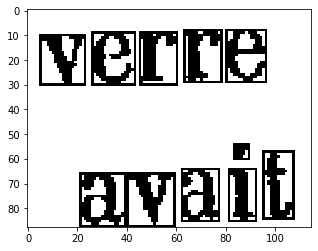

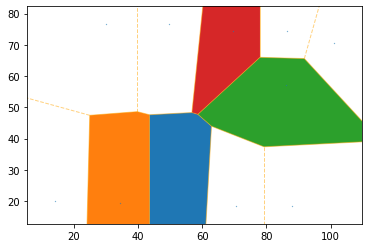

In [302]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

img_name='facile.tif'
img = cv2.imread(img_name, 0)
#img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img_bin=sklearn.preprocessing.binarize(img, threshold_sauvola(img))
#imgok=rotateImage(img_bin, 180)

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
points=[]
for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    points.append([(x+(x+w))/2,(y+(y+h))/2])
    
#print(points)
#print()
vor = Voronoi(points)
vertices=vor.vertices
#print(vertices)

plt.imshow(img_bin,'gray')
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',line_width=1, line_alpha=0.5, point_size=0.5)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

plt.show()
#r=[]
#c=[]
#for i in range(vertices.shape[0]):
    #if vertices[i][1]>0:
     #   r.append(vertices[i][0])
      #  c.append(vertices[i][1])
#plt.plot(r,c,'ro')#,label='fit')

#plt.show()

49 76
30 76
86 74
69 74
101 70
86 57
14 20
52 19
34 19
88 18
70 18


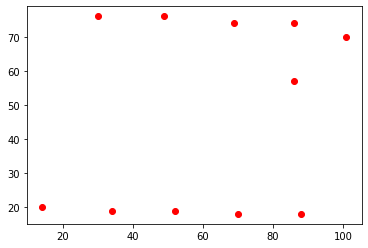

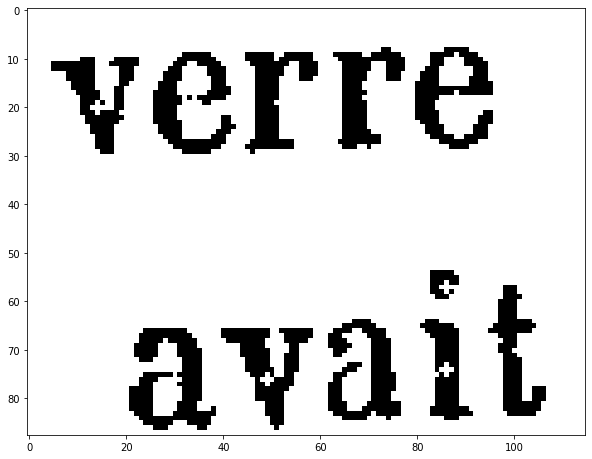

In [321]:
img_name='facile.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img2=img_bin.copy()
contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
points=[]

for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    points.append([(x+(x+w))/2,(y+(y+h))/2])
    cX = int((x+(x+w))/2)
    cY = int((y+(y+h))/2)

    # put text and highlight the center
    cv2.circle(img, (cX, cY), 1, (255, 255, 255), -1)
plt.plot(g,f,'ro')

plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')

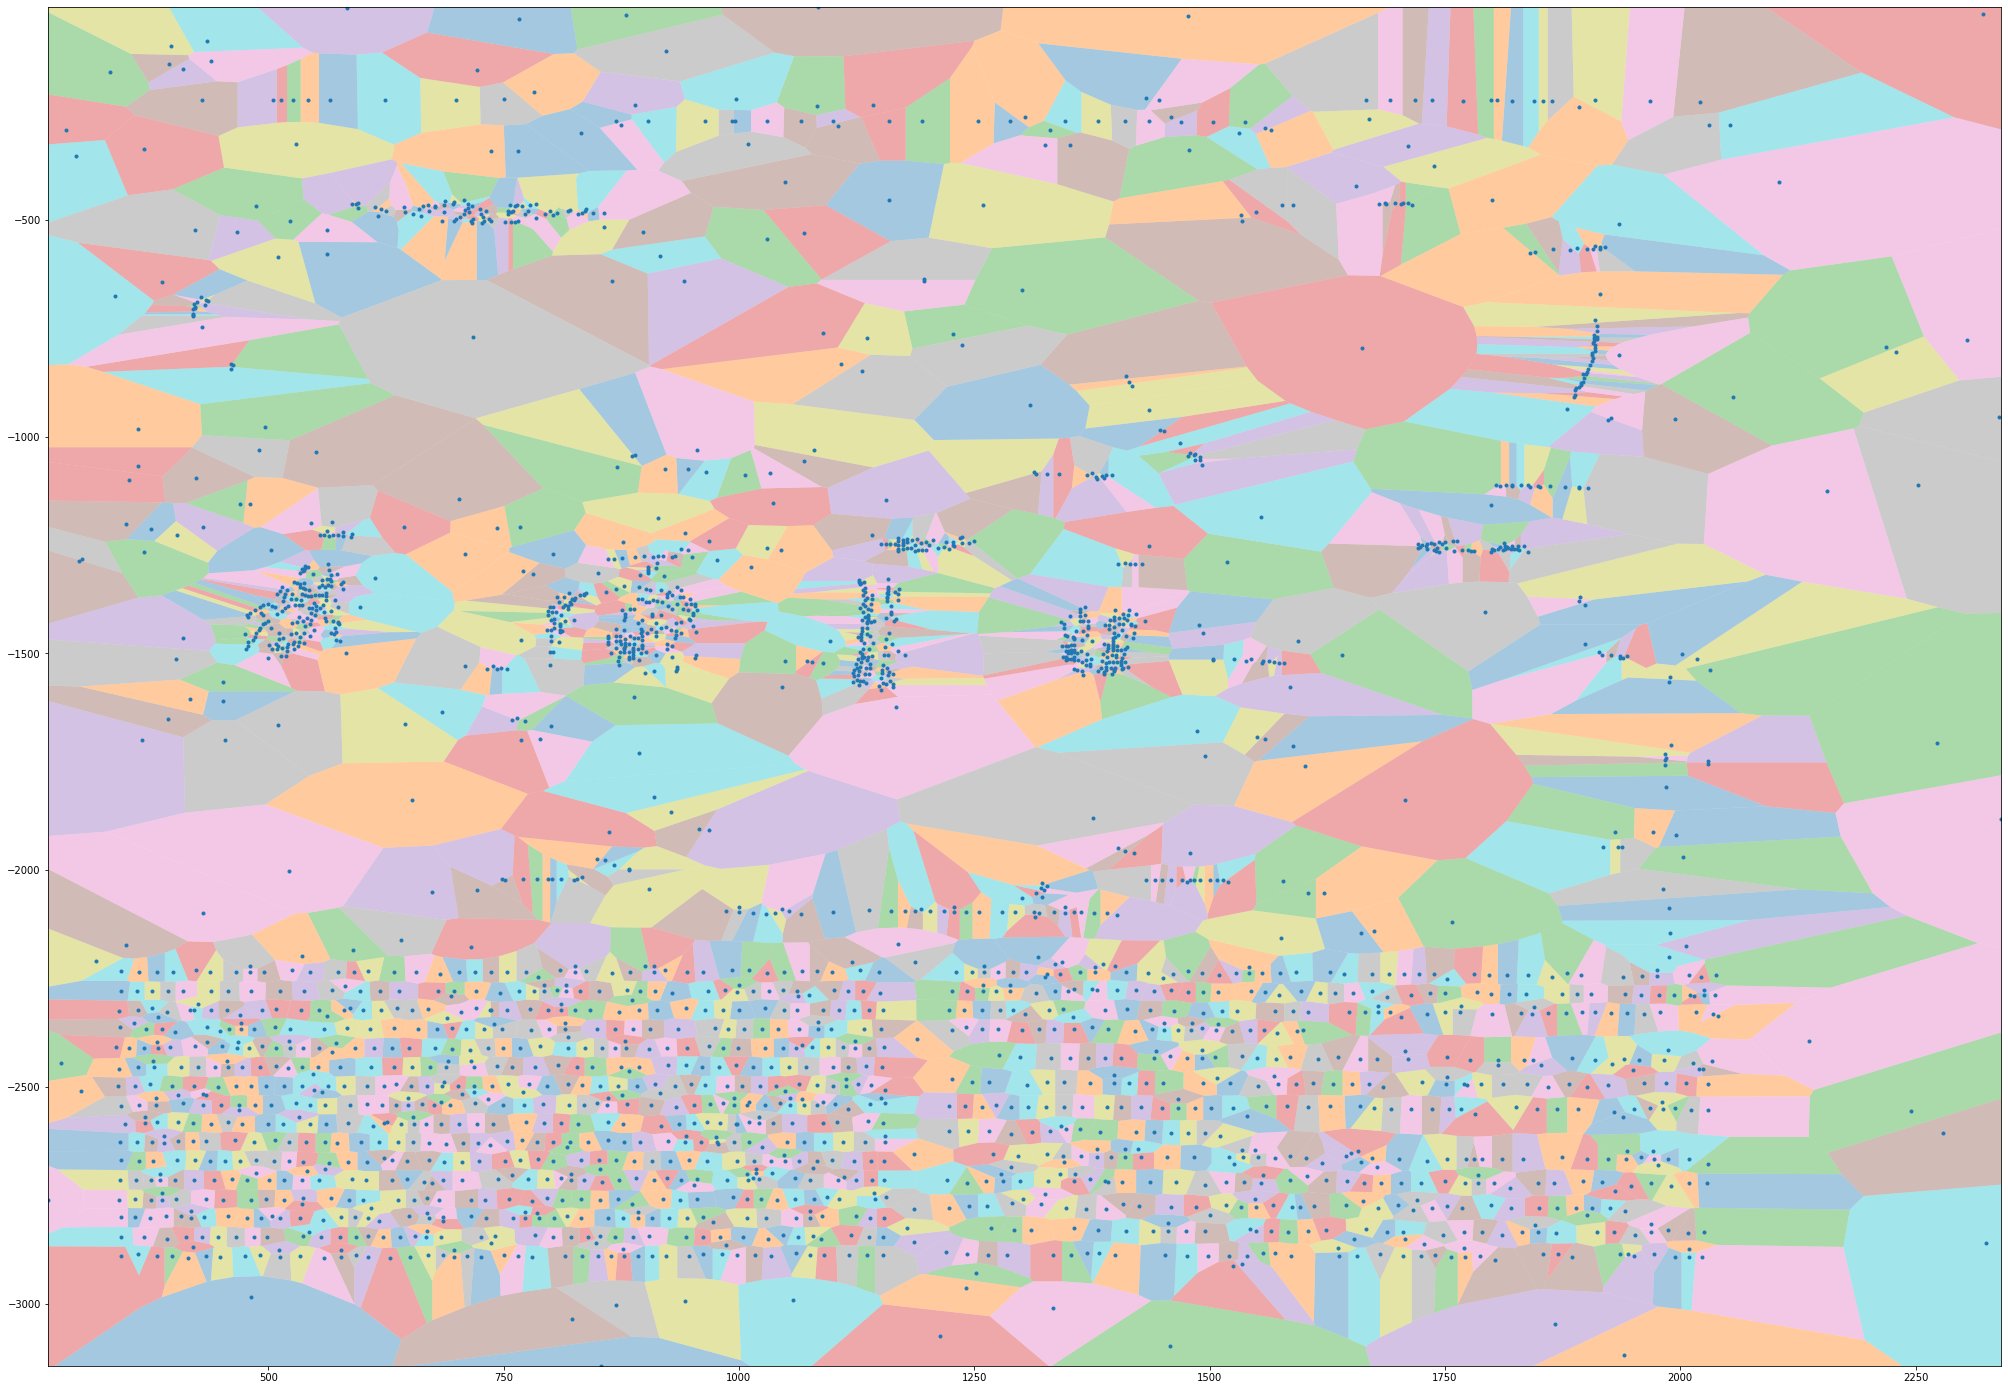

In [201]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
img_name='prova.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
points=[]
for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    points.append([(x+(x+w))/2,-(y+(y+h))/2])
points=np.array(points)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
regions, vertices = voronoi_finite_polygons_2d(vor)
#print ("--")
#print (regions)
#print ("--")
#print (vertices)

# colorize
plt.figure(figsize=(35,25))
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)


plt.plot(points[:,0], points[:,1], '.')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()


0
1
3
4
5
6


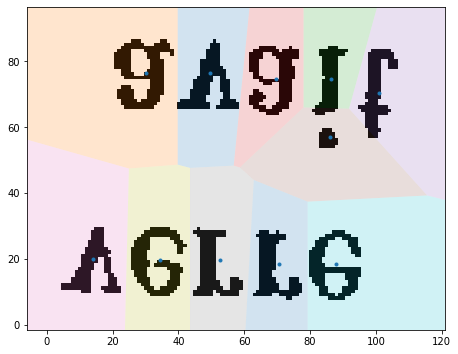

In [52]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
print('0')
img_name='facile.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img2=img_bin.copy()
print('1')
contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
points=[]
for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    points.append([(x+(x+w))/2,(y+(y+h))/2])
    
points=np.array(points)
#print(points)
# compute Voronoi tesselation
print('3')
vor = Voronoi(points)
print('4')
# plot
regions, vertices = voronoi_finite_polygons_2d(vor)
#print ("--")
#print (regions)
#print ("--")
#print (vertices)

# colorize
plt.figure(figsize=(7.5,10))
for region in regions:
    polygon = vertices[region]
    plt.imshow(img, 'gray')
    plt.fill(*zip(*polygon), alpha=0.2)

print('5')
plt.plot(points[:,0], points[:,1], '.')
plt.xlim(vor.min_bound[0] - 20.1, vor.max_bound[0] + 20.1)
plt.ylim(vor.min_bound[1] - 20.1, vor.max_bound[1] + 20.1)
plt.savefig('mainagioia.tif')
print('6')
plt.show()


## Top-Down methods 
### XY Tree

La pagina è splittata in colonne, paragrafi, linee di testo, parole e infine caratteri.

Tramite le proiezioni faccio un taglio 

[[nPixel,pStart, pEnd]]: [[230, 0, 230], [138, 348, 486], [71, 1701, 1772], [150, 1796, 1946], [590, 2917, 3506]]


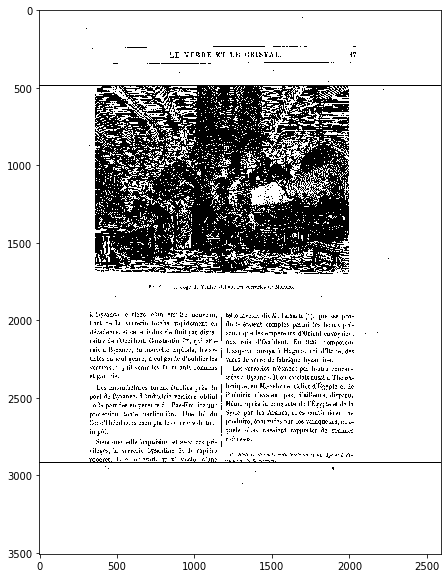

In [397]:
#TAGLIO FUNZIONA BENE!!!
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *

img_name='ok.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

def cutImage(image,nPixel,space,verticalCut: bool = False):
    if verticalCut:
        image = image.T
        
    #Counting black pixels per row (axis=0: col, axis=1:row)
    counts = np.sum(image==0, axis=1) 
    row_number = [i for i in range(image.shape[0])]

    cut=[]

    #cut contiene tutte le righe che hanno meno di nPixel pixel
    for i in range(counts.shape[0]):
        if(counts[i]<nPixel):
            cut.append(i)

    x=0
    h=0
    info=[]
    flag=False
    for j in range(len(cut)-1):
        if cut[j+1]-cut[j]==1:
            if flag==False:
                h=cut[j]
                flag=True
            x=x+1
        else:
            info.append([x,h,cut[j]])
            flag=False
            x=0
    info.append([x,h,cut[j]])
    #print(info)
    
    delete=[]
    for k in range(len(info)):
        if info[k][0]<space:
            delete.append(k)
    for m in range(len(delete)-1,-1,-1):
        info.remove(info[delete[m]])
    print('[[nPixel,pStart, pEnd]]:',info)
    
    for k in range(image.shape[0]):
        for h in range(len(info)):
            if k==info[h][1] or k==info[h][2]:
                for t in range(image.shape[1]):
                    image[k][t]=0
    if verticalCut:
        image = image.T
        cv2.imwrite('verticalCut.tif', image)
    else:
        cv2.imwrite('horizontalCut.tif', image)

#horizontalCut
cutImage(img_bin,50,50)
#verticalCut
#cutImage(img_bin,50,20,True)

plt.figure(figsize=(10,10))
plt.imshow(img_bin,'gray')
plt.show()

(fatto veloce per capire se funzionava) -->Funziona ma va generalizzato il codice..

In [299]:
def cutMatrix():
    img_name='prova2.tif'
    img = cv2.imread(img_name, 0)
    img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    cuttingLines=[100,448,1897,3017]
    #crop_img = img[x:x+h, y:y+w]
    crop_img = img[100:448,0:img_bin.shape[1]]
    crop_img2 = img[448:1897,0:img_bin.shape[1]]
    crop_img3 = img[1897:3017,0:img_bin.shape[1]]
    plt.imshow(crop_img, 'gray'),plt.show()
    plt.imshow(crop_img2, 'gray'),plt.show()
    plt.imshow(crop_img3, 'gray'),plt.show()
    cutImage(crop_img3,50,5,verticalCut=True)
    cuttingVlines=[5, 1148, 1181, 2029]
    crop_img4 = crop_img3[0:crop_img3.shape[0],0:1148]
    crop_img5 = crop_img3[0:crop_img3.shape[0],1181:2029]
    plt.imshow(crop_img4, 'gray'),plt.show()
    plt.imshow(crop_img5, 'gray'),plt.show()
    
    
cutMatrix()


[100, 448, 1897, 3017]


In [306]:
names = []
for x in range(3):
    new_name = input("Name: ")
    while new_name in names:
        new_name = input("Please enter another name: ")
    names.append(new_name)
print(names)

Name: A
Name: B
Name: C
['A', 'B', 'C']


**----------------------> crea l'albero <-----------------------**

In [333]:
import itertools
import operator

class Node:
    def __init__(self):
        self.name: str = ''
        self.children: List[Node] = []
        self.parent: Node = self

    def __getitem__(self, i: int) -> 'Node':
        return self.children[i]

    def add_child(self):
        child = Node()
        self.children.append(child)
        child.parent = self
        return child

    def __str__(self) -> str:
        def _get_character(x, left, right) -> str:
            if x < left:
                return '/'
            elif x >= right:
                return '\\'
            else:
                return '|'

        if len(self.children):
            children_lines: Sequence[List[str]] = list(map(lambda child: str(child).split('\n'), self.children))
            widths: Sequence[int] = list(map(lambda child_lines: len(child_lines[0]), children_lines))
            max_height: int = max(map(len, children_lines))
            total_width: int = sum(widths) + len(widths) - 1
            left: int = (total_width - len(self.name) + 1) // 2
            right: int = left + len(self.name)

            return '\n'.join((self.name.center(total_width),
                ' '.join(map(lambda width, position: _get_character(position - width // 2, left, right).center(width),
                             widths, itertools.accumulate(widths, operator.add))),
                *map(lambda row: ' '.join(map(
                        lambda child_lines: child_lines[row] if row < len(child_lines) else ' ' * len(child_lines[0]),
                        children_lines)),range(max_height))))
        else:
            return self.name
        
tree = Node()

tree.name = 'Page(root)'

tree.add_child()
tree[0].name = 'Child node 0'

tree.add_child()
tree[1].name = 'Child node 1'
'''
tree.add_child()
tree[2].name = 'Child node 2'
'''
tree[1].add_child()
tree[1][0].name = 'Grandchild 1.0'
'''
tree[2].add_child()
tree[2][0].name = 'Grandchild 2.0'
tree[2].add_child()
tree[2][1].name = 'Grandchild 2.1' '''
print(tree)

         Page(root)        
     /             \       
Child node 0  Child node 1 
                   |       
             Grandchild 1.0
